In [1]:
# generate two moons dataset
from sklearn.datasets import make_moons

from matplotlib import pyplot
from pandas import DataFrame

In [2]:
# generate 2d classification dataset
X, y = make_moons(n_samples=100, noise=0.2, random_state=1)

# scatter plot, dots colored by class value
df = DataFrame(dict(x=X[:,0], 
                    y=X[:,1], 
                    label=y))

colors = {0:'red', 1:'blue'}

grouped = df.groupby('label')

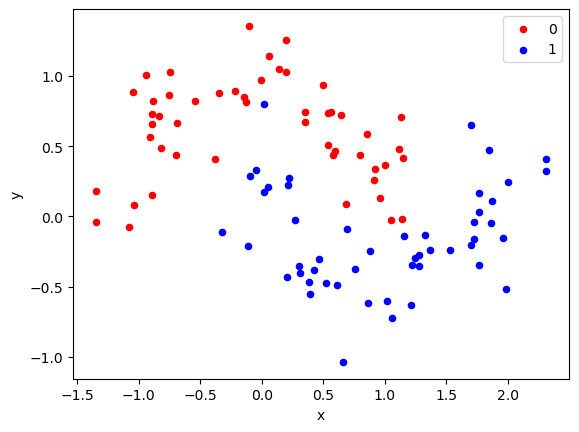

In [3]:
fig, ax = pyplot.subplots()

for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
    
pyplot.show()

#### Overfit Multilayer Perceptron
We can develop an MLP model to address this binary classification problem.

The model will have one hidden layer with more nodes than may be required to solve this problem, providing an opportunity to overfit. We will also train the model for longer than is required to ensure the model overfits.

Before we define the model, we will split the dataset into train and test sets, using 30 examples to train the model and 70 to evaluate the fit model’s performance.

In [4]:
# split into train and test
n_train = 30

trainX, testX = X[:n_train, :], X[n_train:, :]
trainy, testy = y[:n_train],    y[n_train:]

Next, we can define the model.

The hidden layer uses 500 nodes and the rectified linear activation function. A sigmoid activation function is used in the output layer in order to predict class values of 0 or 1. The model is optimized using the binary cross entropy loss function, suitable for binary classification problems and the efficient Adam version of gradient descent.

In [5]:
from keras.models import Sequential
from keras.layers import Dense

In [6]:
# define model
model = Sequential()

model.add(Dense(500, input_dim=2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 500)               1500      
                                                                 
 dense_1 (Dense)             (None, 1)                 501       
                                                                 
Total params: 2,001
Trainable params: 2,001
Non-trainable params: 0
_________________________________________________________________


In [8]:
%time
# fit model
history = model.fit(trainX, 
                    trainy, 
                    validation_data=(testX, testy), 
                    epochs=50, 
                    verbose=0)

Wall time: 0 ns


In [10]:
history.history

{'loss': [0.7063522338867188,
  0.6894916296005249,
  0.6730527877807617,
  0.6570504903793335,
  0.6415077447891235,
  0.626431405544281,
  0.6117952466011047,
  0.5975916981697083,
  0.5838114619255066,
  0.5704380869865417,
  0.5574585795402527,
  0.544823944568634,
  0.5325435400009155,
  0.5206063389778137,
  0.50899338722229,
  0.49767783284187317,
  0.4866742193698883,
  0.47596660256385803,
  0.4655512869358063,
  0.4554286003112793,
  0.4455816447734833,
  0.43599095940589905,
  0.4266525208950043,
  0.41757839918136597,
  0.4087620675563812,
  0.40020498633384705,
  0.3919122815132141,
  0.38386794924736023,
  0.3760733902454376,
  0.36852315068244934,
  0.3612041175365448,
  0.3541269302368164,
  0.34728434681892395,
  0.34066903591156006,
  0.3342822194099426,
  0.32811927795410156,
  0.3221741318702698,
  0.3164421021938324,
  0.31091615557670593,
  0.3055855333805084,
  0.30045589804649353,
  0.29552343487739563,
  0.2907812297344208,
  0.2862202525138855,
  0.28183495998

In [11]:
# evaluate the model
_, train_acc = model.evaluate(trainX, trainy, verbose=0)
_, test_acc  = model.evaluate(testX,  testy,  verbose=0)

print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

Train: 0.900, Test: 0.729


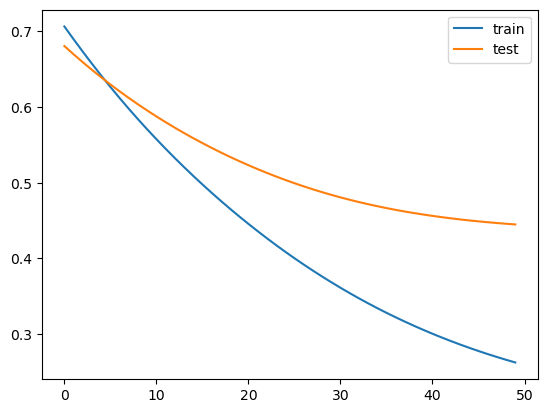

In [12]:
# plot training history
pyplot.plot(history.history['loss'],     label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend();

model has better performance on the training dataset than the test dataset, one possible sign of overfitting.

#### Overfit MLP - handling with Early Stopping
We can update the example and add very simple early stopping.

As soon as the loss of the model begins to increase on the test dataset, we will stop training.

First, we can define the early stopping callback.

In [13]:
from keras.callbacks import EarlyStopping

In [14]:
# simple early stopping
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=0)

We can then update the call to the fit() function and specify a list of callbacks via the “callback” argument.

In [15]:
# define model
model = Sequential()
model.add(Dense(500, input_dim=2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# simple early stopping
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=0)

# fit model 
history = model.fit(trainX, trainy, 
                    validation_data=(testX, testy), 
                    epochs=4000, 
                    verbose=1, 
                    callbacks=[es])

Epoch 1/4000
1/1 [==============================] - 1s 754ms/step - loss: 0.6931 - accuracy: 0.5333 - val_loss: 0.6862 - val_accuracy: 0.4857
Epoch 2/4000
1/1 [==============================] - 0s 33ms/step - loss: 0.6778 - accuracy: 0.5333 - val_loss: 0.6765 - val_accuracy: 0.5714
Epoch 3/4000
1/1 [==============================] - 0s 35ms/step - loss: 0.6629 - accuracy: 0.7000 - val_loss: 0.6671 - val_accuracy: 0.6286
Epoch 4/4000
1/1 [==============================] - 0s 34ms/step - loss: 0.6484 - accuracy: 0.8000 - val_loss: 0.6581 - val_accuracy: 0.6429
Epoch 5/4000
1/1 [==============================] - 0s 43ms/step - loss: 0.6342 - accuracy: 0.8667 - val_loss: 0.6494 - val_accuracy: 0.6714
Epoch 6/4000
1/1 [==============================] - 0s 48ms/step - loss: 0.6205 - accuracy: 0.8667 - val_loss: 0.6409 - val_accuracy: 0.6857
Epoch 7/4000
1/1 [==============================] - 0s 34ms/step - loss: 0.6071 - accuracy: 0.8333 - val_loss: 0.6328 - val_accuracy: 0.6857
Epoch 8/4000

In [16]:
# evaluate the model
_, train_acc = model.evaluate(trainX, trainy, verbose=0)
_, test_acc = model.evaluate(testX, testy, verbose=0)

print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

Train: 1.000, Test: 0.929


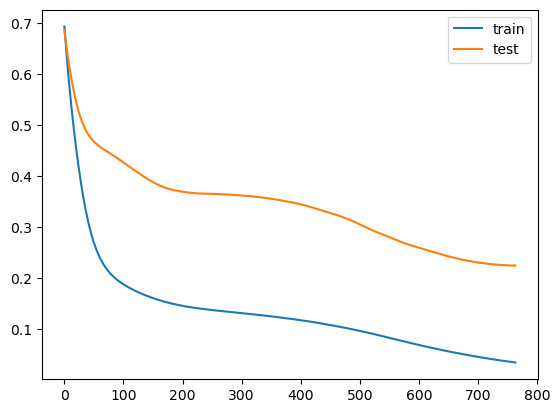

In [17]:
# plot training history
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()

training was stopped at the point when validation loss began to plateau for the first time.

We can improve the trigger for early stopping by waiting a while before stopping.

This can be achieved by setting the “patience” argument.

In this case, we will wait 200 epochs before training is stopped. Specifically, this means that we will allow training to continue for up to an additional 200 epochs after the point that validation loss started to degrade, giving the training process an opportunity to get across flat spots or find some additional improvement.

In [25]:
# define model
model = Sequential()
model.add(Dense(500, input_dim=2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# patient early stopping
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=200)

# fit model
history = model.fit(trainX, trainy, 
                    validation_data=(testX, testy), 
                    epochs=4000, 
                    verbose=0, 
                    callbacks=[es])

Epoch 01063: early stopping


In [19]:
# evaluate the model
_, train_acc = model.evaluate(trainX, trainy, verbose=0)
_, test_acc = model.evaluate(testX, testy, verbose=0)

print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

Train: 1.000, Test: 0.943


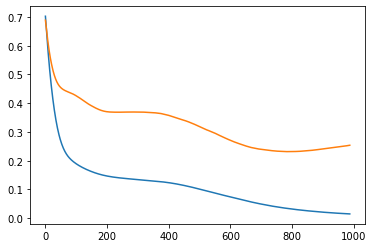

In [21]:
# plot training history
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test');